#### Implement Bagging Classifier on Synthetic Data

In [1]:
import numpy as np
import pandas as pd
import path_setup
from sklearn.datasets import make_blobs, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from Decisiontree import ClassificationTree, RegressionTree
from Ensemble_Learning import BaggingClassifier, BaggingRegressor
from ensemble_utils import *

##### 1. Implement Bagging Classifier on manually generated two-class data

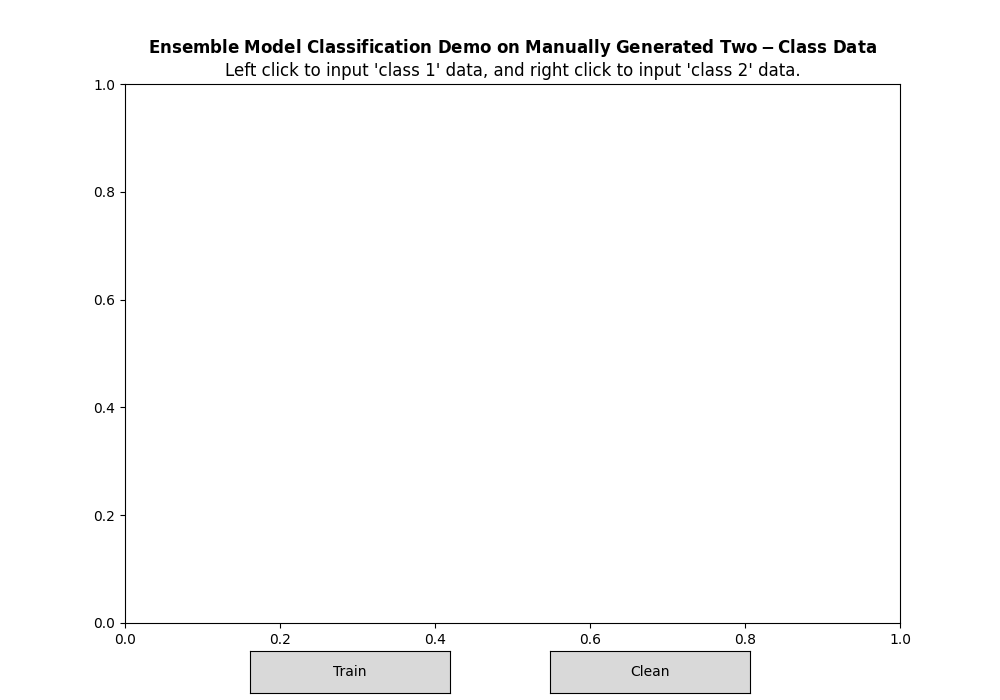

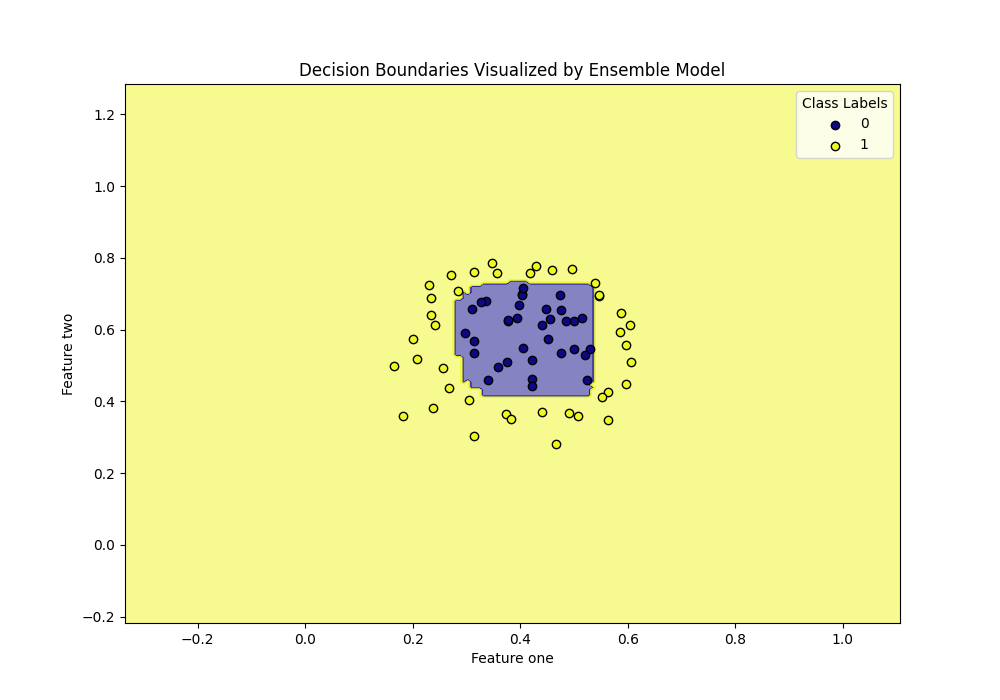

In [3]:
%matplotlib widget
interactive_data_collection_classification('bagging')

##### 2. Implement Bagging Classifier on non-linearly separable two-class data

OOB Score for Bagging Classifier:  0.6046250298537569
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        16
           1       1.00      0.86      0.92        14

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



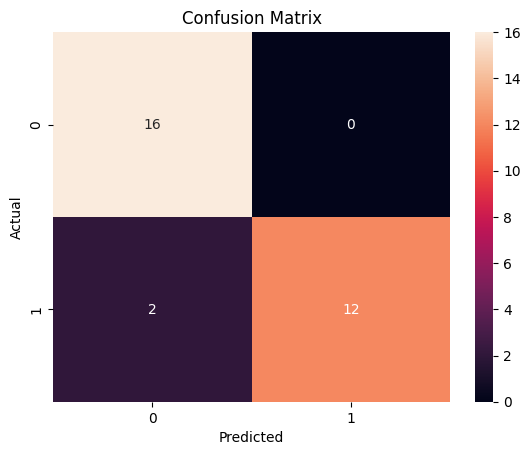

Decision Boundary with Training Data


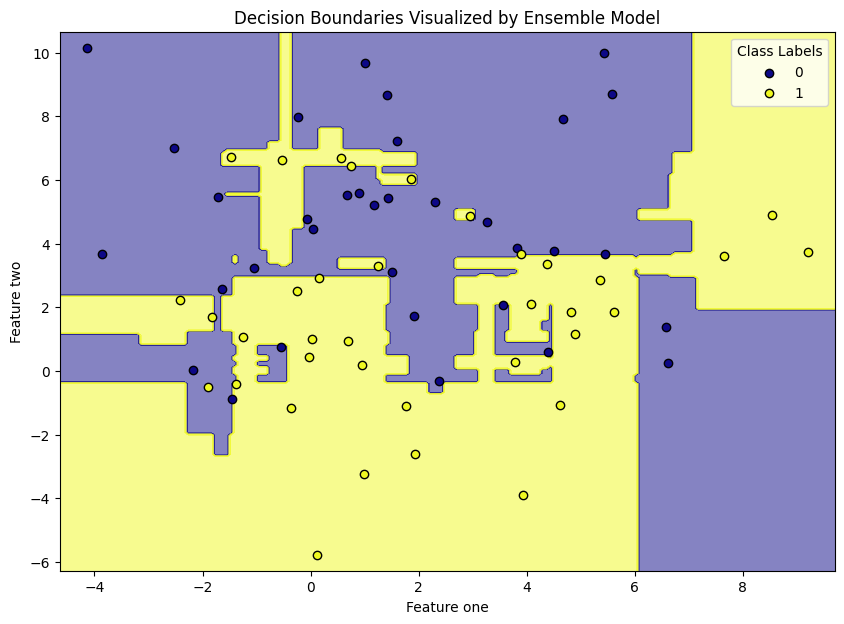

Decision Boundary with Testing Data


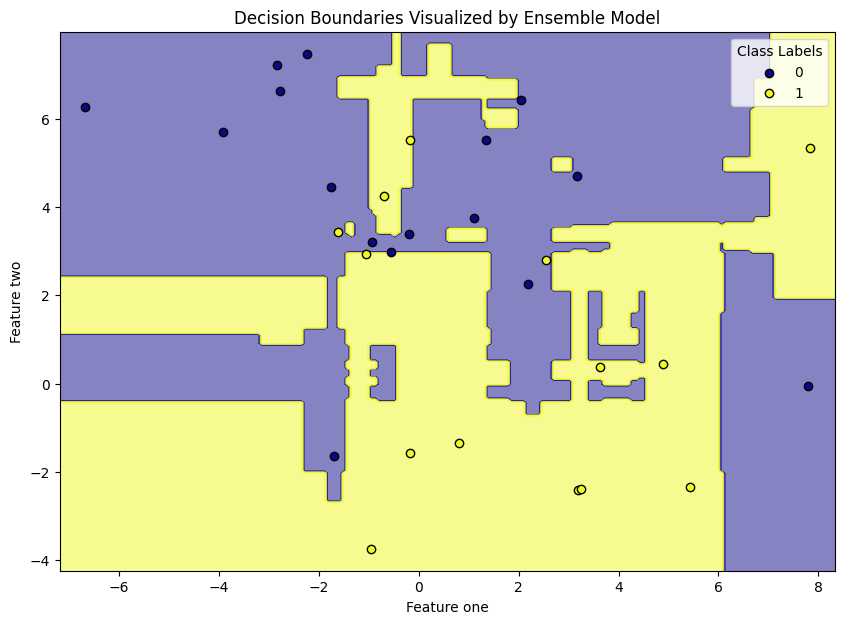

In [2]:
# Create training set
X,y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=3, random_state=0)

# Split the data into training and test sets
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size=0.3, random_state=0)

# Create base classifier
tree = ClassificationTree()

# Create ensemble model
bec = BaggingClassifier(base_model=tree, model_type='classifier', model_number=10)
bec.fit(X, y)
print("OOB Score for Bagging Classifier: ", bec.oob_score)

# Performance Test
pred_y = bec.predict_class(test_X)
evaluate_model(test_Y, pred_y, 'classification')

# Plot decision boundaries and class labels
print('Decision Boundary with Training Data')
create_contour_plot(bec, train_X, train_Y, resolution=200)

print('Decision Boundary with Testing Data')
create_contour_plot(bec, test_X, test_Y, resolution=200)

#### Implement Bagging Classifier on Predicting Marketing Target

In [3]:
# Load Data
market_data = pd.read_csv('../dataset/Social_Network_Ads.csv', header=0)

# Remove the First Column
market_data = market_data.drop(market_data.columns[0], axis=1)

# Training Set
train_X = market_data.iloc[0:300, 0:-1].values
train_Y = market_data.iloc[0:300:, -1].values

# Test Set
test_X = market_data.iloc[300:, 0:-1].values
test_Y = market_data.iloc[300:, -1].values

# Standardize the Features for Both Training Set and Test Set
scaler = StandardScaler()

train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

OOB Score for Bagging Classifier:  0.8610956598569036
              precision    recall  f1-score   support

           0       0.67      0.89      0.76        38
           1       0.92      0.73      0.81        62

    accuracy                           0.79       100
   macro avg       0.79      0.81      0.79       100
weighted avg       0.82      0.79      0.79       100



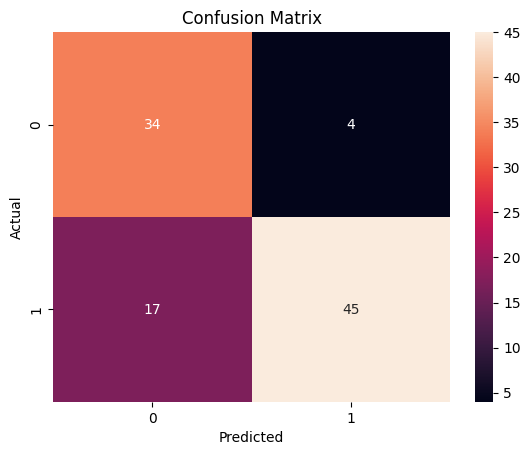

Decision Boundary with Training Data


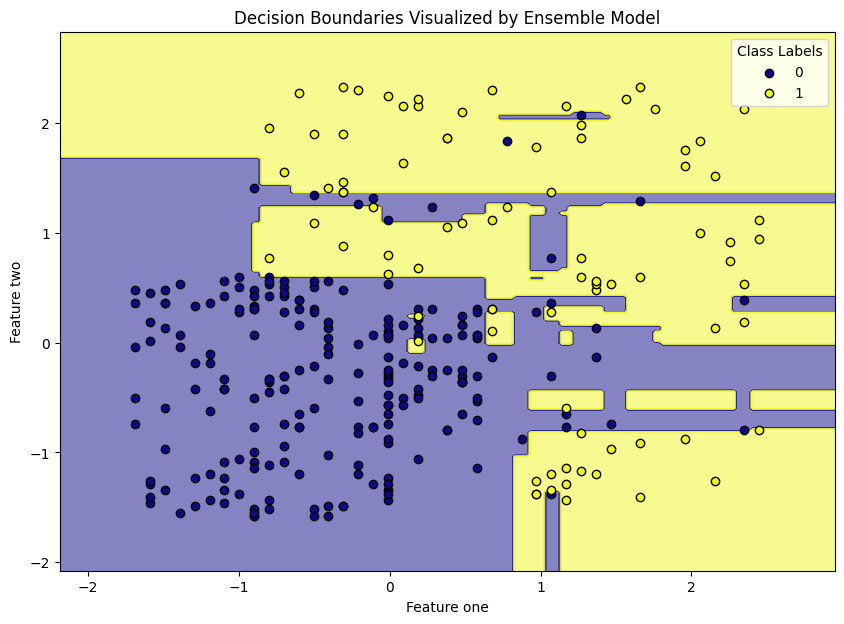

Decision Boundary with Testing Data


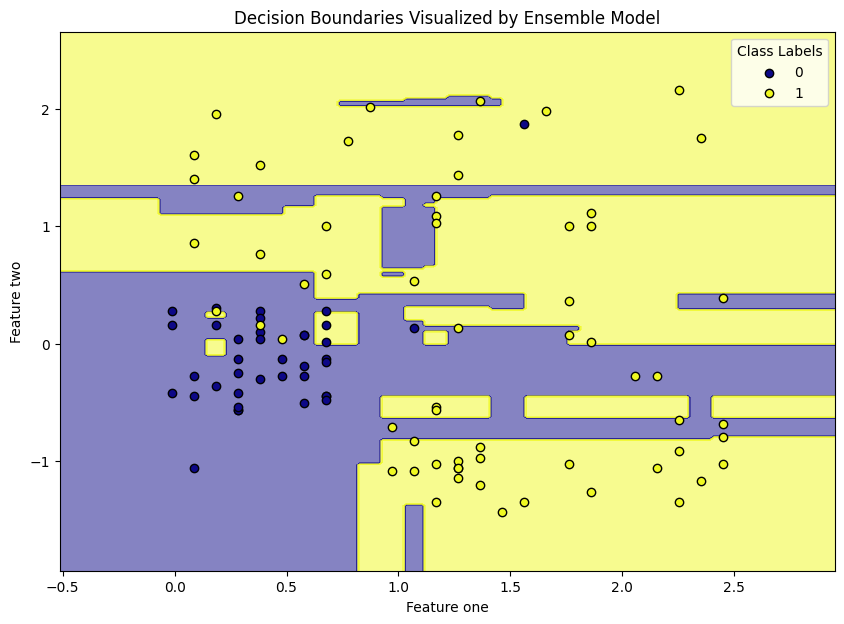

In [4]:
# Create base classifier
tree = ClassificationTree()

# Create ensemble model
bec = BaggingClassifier(base_model=tree, model_type='classifier', model_number=10)
bec.fit(train_X, train_Y)
print("OOB Score for Bagging Classifier: ", bec.oob_score)

# Performance Test
pred_y = bec.predict_class(test_X)
evaluate_model(test_Y, pred_y, 'classification')

# Plot decision boundaries and class labels
print('Decision Boundary with Training Data')
create_contour_plot(bec, train_X, train_Y, resolution=200)

print('Decision Boundary with Testing Data')
create_contour_plot(bec, test_X, test_Y, resolution=200)

#### Implement Bagging Regressor on Synthetic Data

##### 1. Implement Bagging Regressor on manually generated two-class data

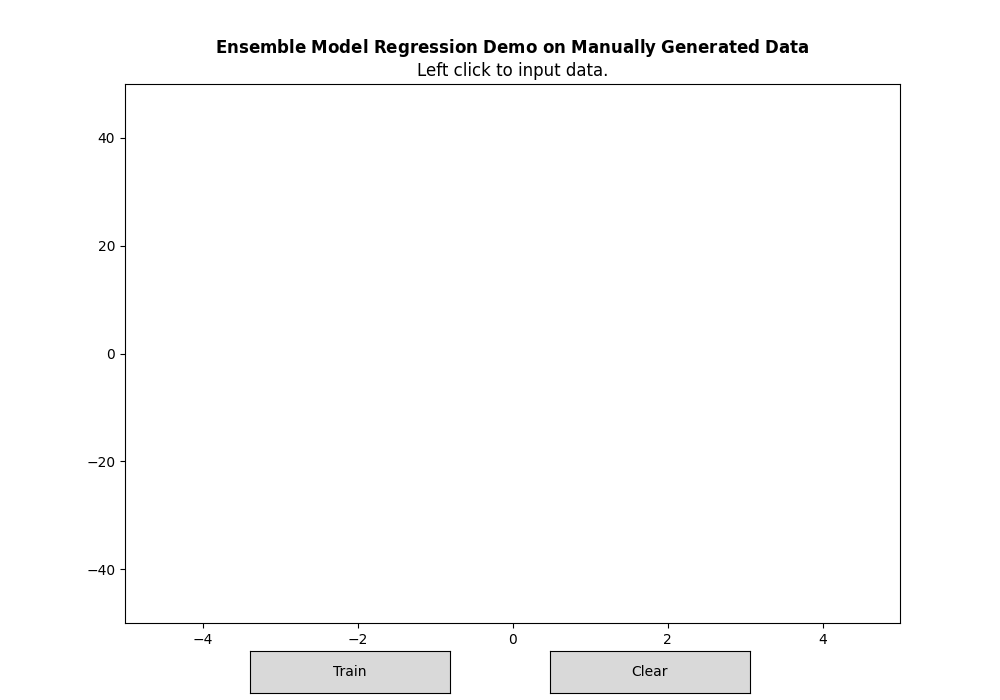

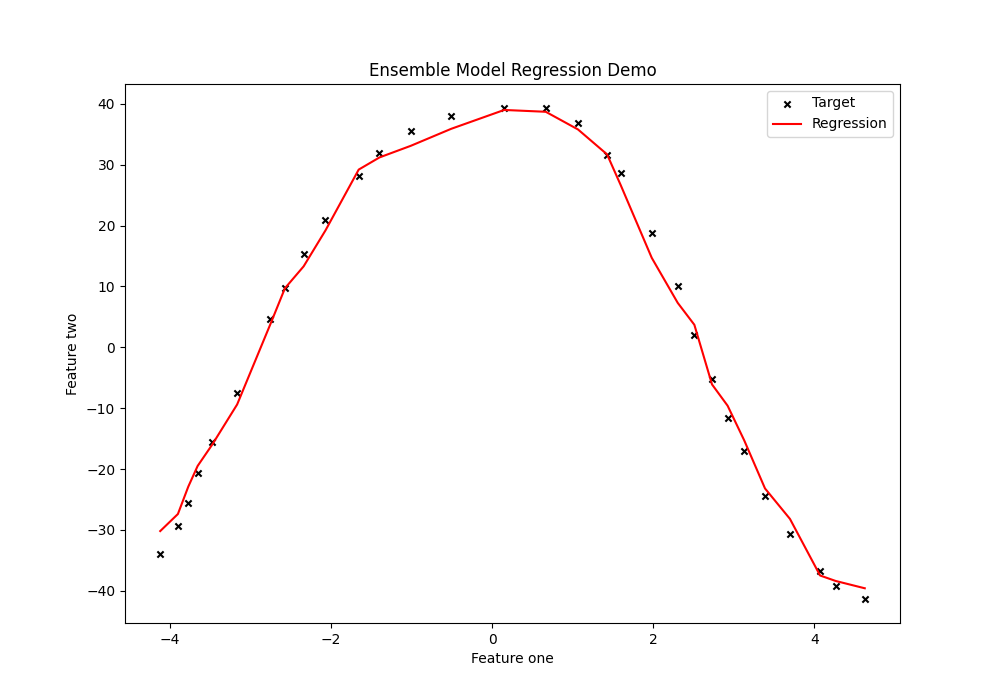

In [2]:
%matplotlib widget
interactive_data_collection_regression('bagging')

##### 2. Implement Bagging Regressor on linear data

OOB Score for Bagging Regressor:  0.8610956598569036


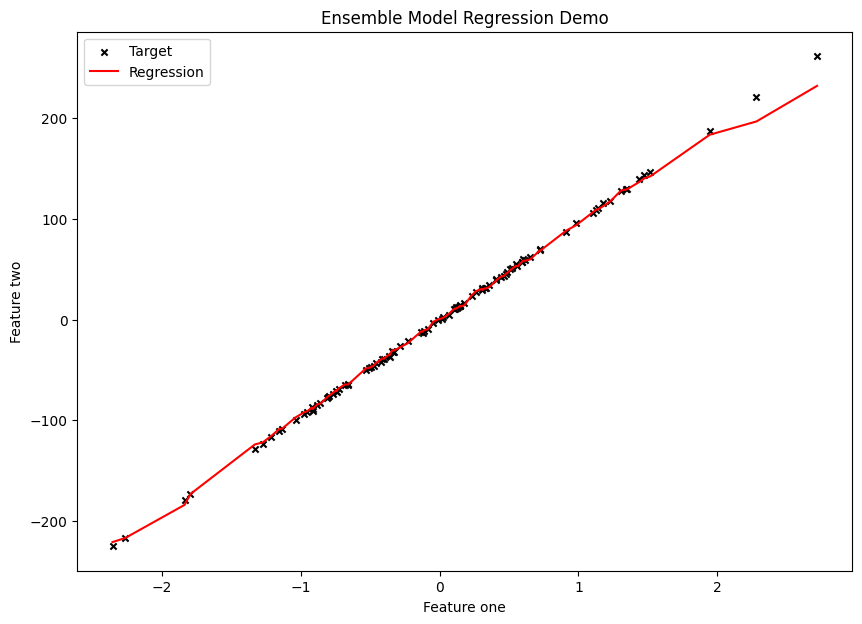

In [5]:
X, y = make_regression(n_samples=100, n_features=1, noise=1)

# Create base regressor
tree = RegressionTree()

# Create base regressors
ber = BaggingRegressor(base_model=tree, model_type='regressor', model_number=10)
ber.fit(X, y)
print("OOB Score for Bagging Regressor: ", bec.oob_score)

# Plot regression and target points
create_regression_plot(ber, X, y)

##### 3. Implement Bagging Regressor on nonlinear data

OOB Score for Bagging Regressor:  0.8610956598569036


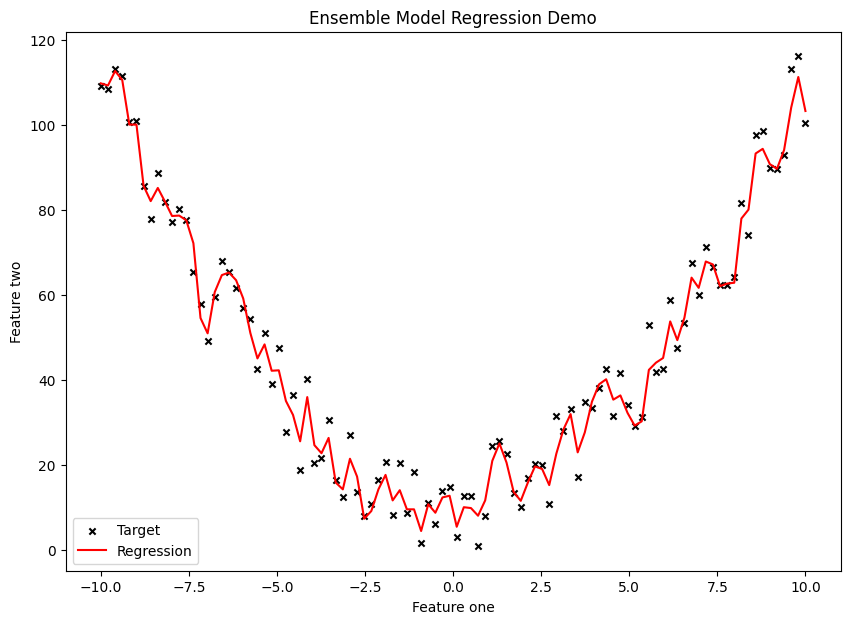

In [6]:
# Create the training set.
X = np.linspace(-10, 10, 100)
y = [x**2 + np.random.rand() * 25 for x in X]

# Create base regressor
tree = RegressionTree()

# Create base regressors
ber = BaggingRegressor(base_model=tree, model_type='regressor', model_number=10)
ber.fit(X, y)
print("OOB Score for Bagging Regressor: ", bec.oob_score)

# Plot regression and target points
create_regression_plot(ber, X, y)

#### Implement Bagging Regressor on Predicting House Price

OOB Score for Bagging Regressor:  0.8610956598569036


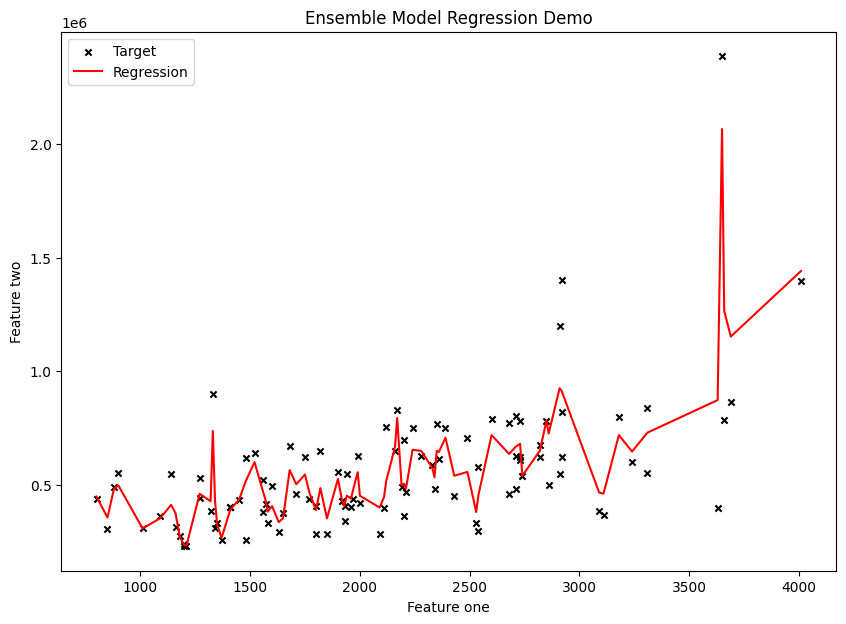

R-squared score (R²):  0.3856877811960884


In [7]:
# Load Data
house_data = pd.read_csv('../dataset/house_price.csv')

# Select first 100 training and next 50 testing data
train_X = np.array(house_data['sqft_living'].head(100))
train_Y = np.array(house_data['price'].head(100))
test_X = np.array(house_data['sqft_living'].iloc[100:150])
test_Y = np.array(house_data['price'].iloc[100:150])

# Create base regressor
tree = RegressionTree()

# Create base regressors
ber = BaggingRegressor(base_model=tree, model_type='regressor', model_number=10)
ber.fit(train_X, train_Y)
print("OOB Score for Bagging Regressor: ", bec.oob_score)

# Plot regression and target points
create_regression_plot(ber, train_X, train_Y)

# Evaluate model performance on testing data
pred_Y = ber.predict_value(test_X)
evaluate_model(test_Y, pred_Y, 'regression')